#imports



In [4]:
pip install visualkeras

     |████████████████████████████████| 795 kB 6.2 MB/s 


In [5]:
from tensorflow import keras
from functools import partial
from tensorflow.python.client import device_lib
import numpy as np
import visualkeras

#Check current GPU

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13356741250877500805
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11321147392
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7097831489999532735
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


#Fetch Dataset


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

output_labels = len(class_names)
input_height = 28
input_width = 28

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(55000, 28, 28)

#RNN


In [7]:
hidden_nodes = int(2*input_width*output_labels/3)

modelRNN = keras.models.Sequential([
  keras.layers.LSTM(hidden_nodes, return_sequences=False, input_shape=(input_width, input_height)),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(units=output_labels, activation="softmax"),
])

modelRNN.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [8]:
historyRNN = modelRNN.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 27s 13ms/step - loss: 0.5930 - accuracy: 0.7813 - val_loss: 0.4501 - val_accuracy: 0.8336
Epoch 2/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4166 - accuracy: 0.8466 - val_loss: 0.3721 - val_accuracy: 0.8672
Epoch 3/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3666 - accuracy: 0.8646 - val_loss: 0.3349 - val_accuracy: 0.8732
Epoch 4/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3347 - accuracy: 0.8755 - val_loss: 0.3293 - val_accuracy: 0.8764
Epoch 5/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3120 - accuracy: 0.8839 - val_loss: 0.3131 - val_accuracy: 0.8808
Epoch 6/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2950 - accuracy: 0.8886 - val_loss: 0.3047 - val_accuracy: 0.8806
Epoch 7/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2779 - accuracy: 0.8964 - val_loss: 0.2777 -

#2 Layer LSTM

In [8]:
modelRNN2 = keras.models.Sequential([
  keras.layers.LSTM(input_height*input_width, return_sequences=True, input_shape=(input_width, input_height)),
  keras.layers.Dropout(0.2),
  keras.layers.LSTM(hidden_nodes, return_sequences=False, input_shape=(input_width, input_height*input_width)),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(units=output_labels, activation="softmax"),
])

modelRNN2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
historyRNN2 = modelRNN2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 72s 38ms/step - loss: 0.5902 - accuracy: 0.7807 - val_loss: 0.4113 - val_accuracy: 0.8424
Epoch 2/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.4025 - accuracy: 0.8498 - val_loss: 0.3600 - val_accuracy: 0.8656
Epoch 3/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.3470 - accuracy: 0.8712 - val_loss: 0.3267 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.3120 - accuracy: 0.8841 - val_loss: 0.2987 - val_accuracy: 0.8894
Epoch 5/10
1719/1719 [==============================] - 65s 38ms/step - loss: 0.2869 - accuracy: 0.8932 - val_loss: 0.2961 - val_accuracy: 0.8880
Epoch 6/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2646 - accuracy: 0.9024 - val_loss: 0.2888 - val_accuracy: 0.8952
Epoch 7/10
1719/1719 [==============================] - 63s 37ms/step - loss: 0.2457 - accuracy: 0.9075 - val_loss: 0.2787 -

#CNN

In [9]:
DefaultConv2D = partial(keras.layers.Conv2D,kernel_size=3, activation='relu', padding="SAME")

modelCNN = keras.models.Sequential([    
  DefaultConv2D(filters=64, kernel_size=7, input_shape=[input_width, input_height, 1]),    
  keras.layers.MaxPooling2D(pool_size=2),    
  DefaultConv2D(filters=128),    
  DefaultConv2D(filters=128),    
  keras.layers.MaxPooling2D(pool_size=2),    
  DefaultConv2D(filters=256),    
  DefaultConv2D(filters=256),    
  keras.layers.MaxPooling2D(pool_size=2),   
  keras.layers.Flatten(),    
  keras.layers.Dense(units=128, activation='relu'),    
  keras.layers.Dropout(0.5),   
  keras.layers.Dense(units=64, activation='relu'),    
  keras.layers.Dropout(0.5),    
  keras.layers.Dense(units=output_labels, activation='softmax'),
])

modelCNN.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history = modelCNN.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 54s 16ms/step - loss: 0.7821 - accuracy: 0.7197 - val_loss: 0.3767 - val_accuracy: 0.8582
Epoch 2/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.4549 - accuracy: 0.8430 - val_loss: 0.3174 - val_accuracy: 0.8864
Epoch 3/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.3866 - accuracy: 0.8674 - val_loss: 0.2895 - val_accuracy: 0.8942
Epoch 4/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.3409 - accuracy: 0.8826 - val_loss: 0.2950 - val_accuracy: 0.8972
Epoch 5/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.3096 - accuracy: 0.8949 - val_loss: 0.2720 - val_accuracy: 0.9018
Epoch 6/10
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2873 - accuracy: 0.9011 - val_loss: 0.2526 - val_accuracy: 0.9094
Epoch 7/10
1719/1719 [==============================] - 28s 16ms/step - loss: 0.2729 - accuracy: 0.9071 - val_loss: 0.2577 -

#Summaries

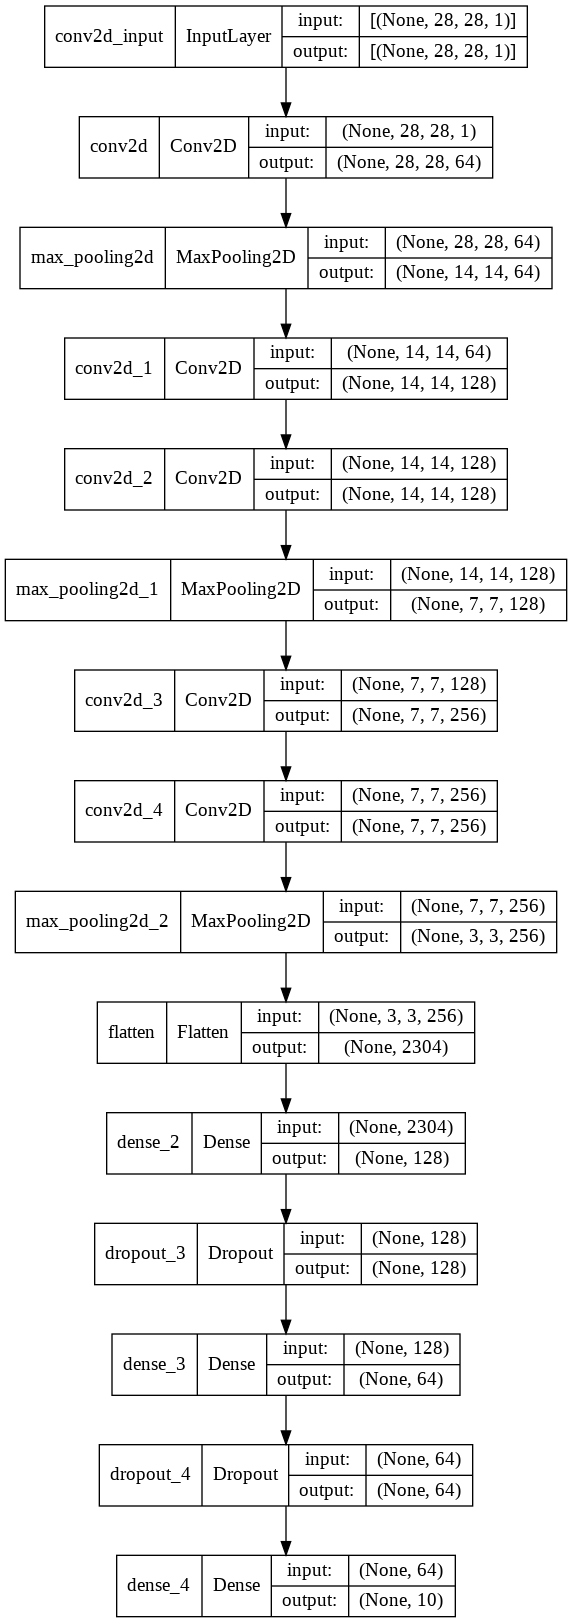

In [10]:
keras.utils.plot_model(modelRNN, to_file='outputrnn.png', show_shapes=True)
keras.utils.plot_model(modelRNN2, to_file='outputrnn2.png', show_shapes=True)
keras.utils.plot_model(modelCNN, to_file='outputcnn.png', show_shapes=True)

In [ ]:
modelRNN.summary()
modelRNN2.summary()
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 186)               159960    
                                                                 
 dropout_1 (Dropout)         (None, 186)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1870      
                                                                 
Total params: 161,830
Trainable params: 161,830
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 784)           2549568   
                                                                 
 dropout_2 (Dropout)      